<a href="https://colab.research.google.com/github/Bebe-Ai/Ai-Playground/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the environment

In [11]:
!apt-get update
!apt-get install -y cmake libgtk2.0-dev
!pip install -r requirements.txt

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

# Find faces in pictures
We start by loading an example picture using Python imaging library. Go ahead and **run the cell bellow** to see the image.

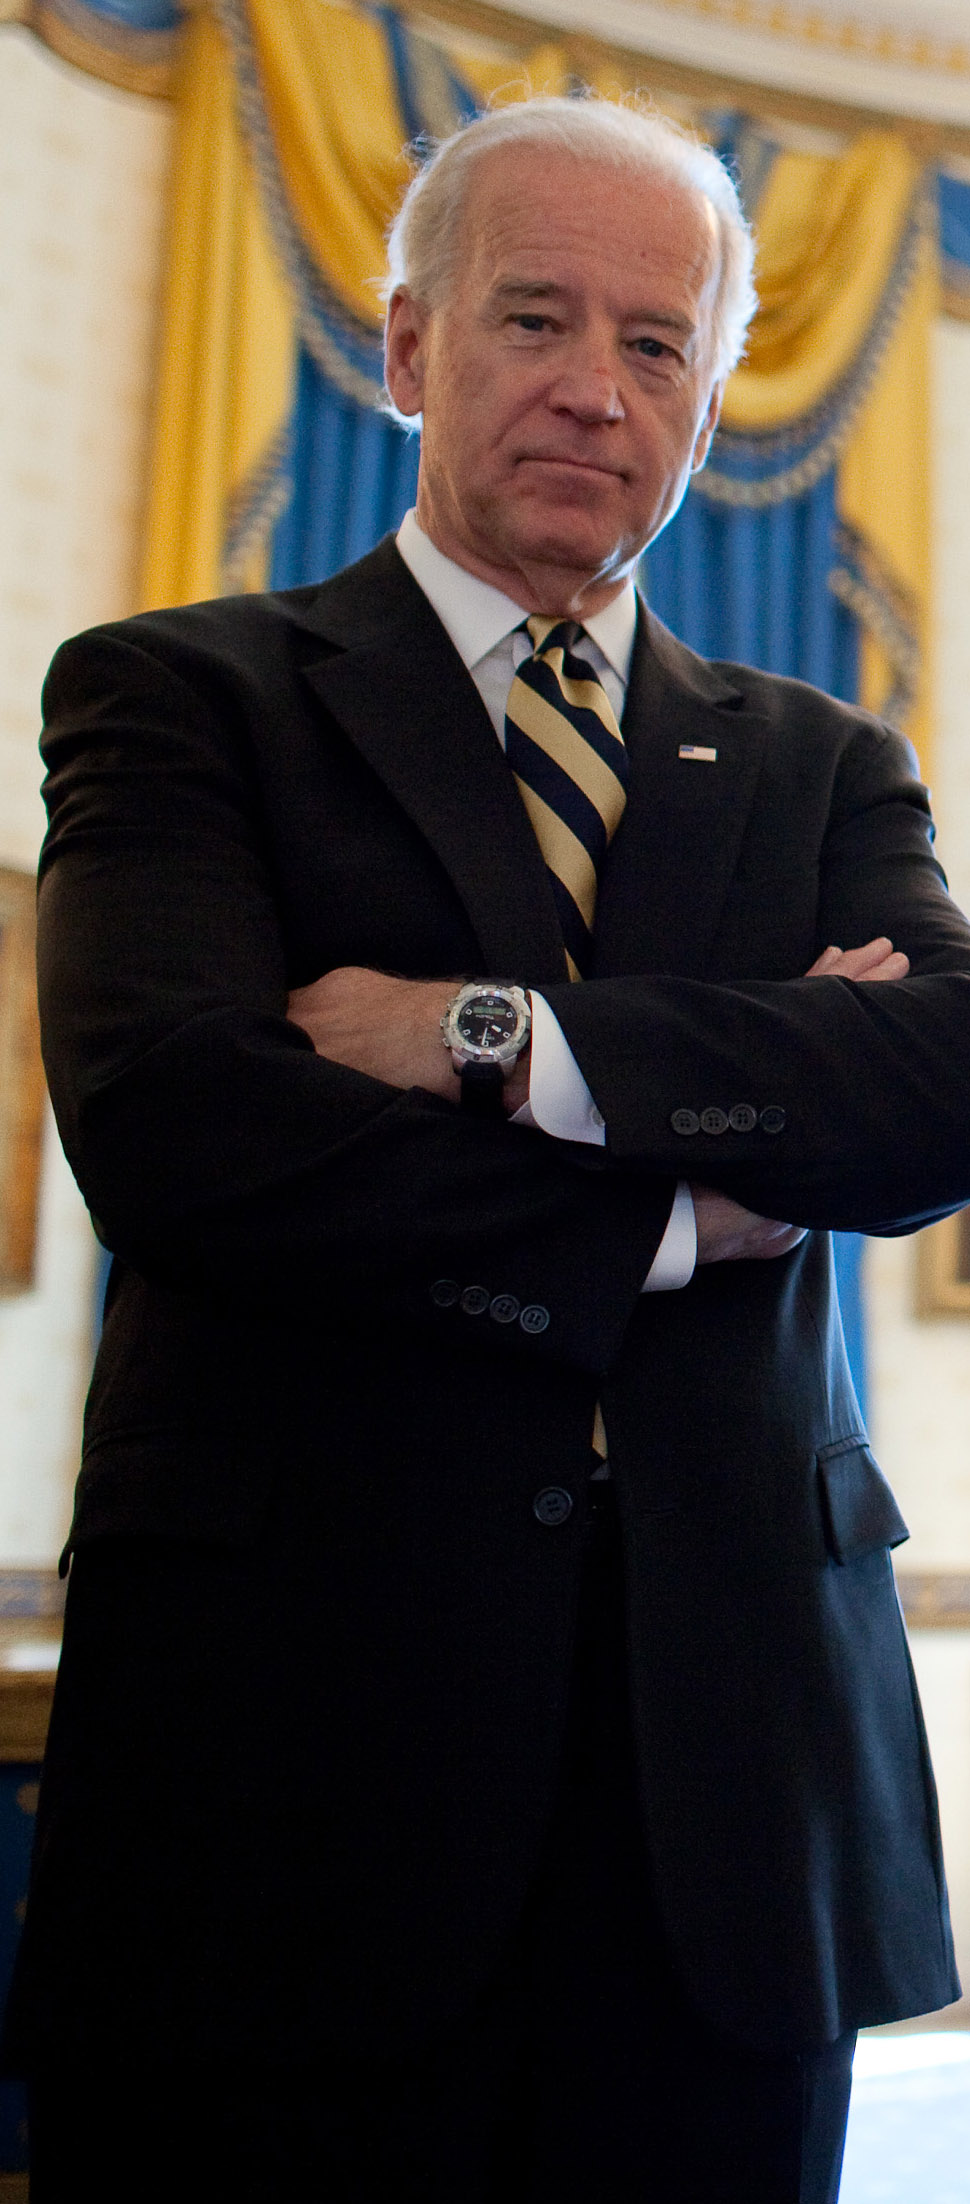

In [12]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('biden.jpg')
display(pil_im)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Learning from example
Now we show the library two different faces ([Joe Biden](/biden.jpg), [Barack Obama](/obama.jpg)) and generate the encodings for them. Encoding is simply a low dimensional representation of a face that can be easily compared with other faces the library will recognize in the future.

In [25]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.
# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
# Load xyy sample picture and learn how to recognize it.
xyy_image = face_recognition.load_image_file("xyy.png")
xyy_face_encoding = face_recognition.face_encodings(xyy_image)[0]
# Load gdg sample picture and learn how to recognize it.
gdg_image = face_recognition.load_image_file("gdg.png")
gdg_face_encoding = face_recognition.face_encodings(gdg_image)[0]
dongkun1_image = face_recognition.load_image_file("dongkun1.jpg")
dongkun1_face_encoding = face_recognition.face_encodings(dongkun1_image)[0]
# Create arrays of known face encodings and their names
known_face_encodings = [
obama_face_encoding,
 biden_face_encoding,
 xyy_face_encoding,
 gdg_face_encoding,
 dongkun1_face_encoding,
]
known_face_names = [
 "Barack Obama",
 "Joe Biden",
 "Xiao Yueyue",
 "Guo Degang",
 "Dong Kun"]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 2 images.
Learned encoding for 5 images.


# Showtime
Finally, we load the image we looked at in the first cell, find the faces in the image and compare them with the encodings the library generated in the previous step. We can see that library now correctly recognizes Barack and Joe in the input.

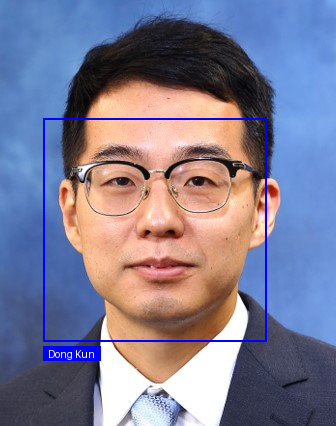

In [26]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("dongkun2.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)
# Use the default bitmap font
font = ImageFont.load_default()

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_idx = np.argmin(face_distances)
    name = known_face_names[best_match_idx] if matches[best_match_idx] else "Unknown"

    # draw the face rectangle
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255), width=2)

    # measure the text box with Pillow ≥ 10
    bbox = draw.textbbox((0, 0), name, font=font)  # (x0, y0, x1, y1)
    text_w = bbox[2] - bbox[0]
    text_h = bbox[3] - bbox[1]
    label_top = bottom + 5
    label_bottom = label_top + text_h + 4

    # draw the background rectangle and add the label
    draw.rectangle(((left, label_top), (left + text_w + 10, label_bottom)),
                   fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 5, label_top + 2), name,
              fill=(255, 255, 255), font=font)

del draw  # release Pillow drawing object
display(pil_image)